# Get Immutable Reference Benchmarks

In [1]:
# select measurement file
files = [
    "../output/2024-12-01 19-55-29 get.json",
    "../output/2024-12-01 19-57-26 baseline get.json",
]

# select style options
grey_fill_between = False

enable_storage_reference = False

if grey_fill_between:
    fill_between_args = {"color": "grey"}
else:
    fill_between_args = {}
    
show_error_bar = False

unit = "ms"

In [2]:
# parse data
import json

raw_data = []
for file_name in files:
    with open(file_name) as file:
        raw_data.extend(json.load(file))

In [3]:
from util.convert import convert_datasets
import pandas as pd

ovpm = convert_datasets(
    raw_data,
    "vNV-Heap",
    [("get_min", "Best Case"), ("get_max_min", "Worst-Best Case"), ("get_min_max", "Best-Worst Case"), ("get_max", "Worst Case")],
    ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

baseline = convert_datasets(
    raw_data,
    "Baseline",
    [("baseline_get_min", "Best Case"), ("baseline_get_max_min", "Worst-Best Case"), ("baseline_get_min_max", "Best-Worst Case"), ("baseline_get_max", "Worst Case")],
    ["mean", "min", "max", "options.object_size", "options.bucket_size", "options.modules", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

dataset = pd.concat([ovpm, baseline])
dataset.head()

,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions,ticks_per_ms,dataset_type,benchmark_title,benchmark_id,options.bucket_size
0,855.4,855,856,8,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heap,Best Case,get_min,NaN
1,811.3,811,812,16,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heap,Best Case,get_min,NaN
2,868.4,868,869,32,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heap,Best Case,get_min,NaN
3,920.6,918,944,48,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heap,Best Case,get_min,NaN
4,921.4,918,945,64,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,10,16000,vNV-Heap,Best Case,get_min,NaN


In [4]:
from util.convert import display_dataset_infos_combined

display_dataset_infos_combined(dataset)

min    50.300
max    61.775
Name: mean, dtype: float64

min    50.32500
max    61.76875
Name: mean, dtype: float64

min     505.65625
max    1271.73125
Name: mean, dtype: float64

min    1422.0500
max    4559.3375
Name: mean, dtype: float64

min    28.9375
max    28.9875
Name: mean, dtype: float64

min    31.69375
max    32.03125
Name: mean, dtype: float64

min    1133.12500
max    1133.51875
Name: mean, dtype: float64

min    1867.6375
max    1867.6875
Name: mean, dtype: float64

# Final Plot

<Axes: xlabel='Object Size [Bytes]', ylabel='Latency in ms'>

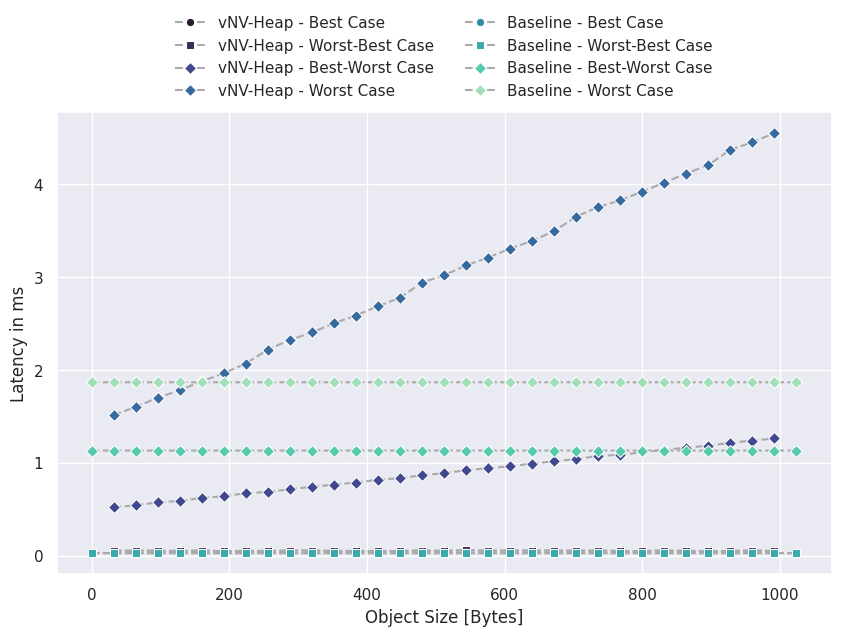

In [20]:
from util.plot import plot_lines

scale = 32
max_size = 1024

def get_plot_data(dataset, marker_dict):
    res = []
    for id in dataset["benchmark_id"].unique():
        row = dataset[dataset["benchmark_id"] == id].iloc[0].to_dict()
        data = dataset[dataset["benchmark_id"] == id]
        data = data[data["options.object_size"] % scale == 0]

        res.append({
            "name": f"{row["dataset_type"]} - {row["benchmark_title"]}",
            "x": "options.object_size",
            "y": "mean",
            "marker": marker_dict[row["benchmark_title"]],
            "data": data
        })
    
    
    return res

plot_data = get_plot_data(dataset, {
    "Best Case": "o",
    "Worst-Best Case": "s",
    "Best-Worst Case": "D",
    "Worst Case": "D"
})

options = {
    "data": plot_data,
    "scale": unit,
    "x_label": "Object Size [Bytes]",
    "y_label": f"Latency in {unit}",
    "legend_cols": 2
}

plot_lines(options)